# Read processed song data from pkl file

In [12]:
import pickle
import os


results_file = 'audio_features.pkl'

if os.path.exists(results_file):
    with open(results_file, 'rb') as file:
        saved_data = pickle.load(file)
    X = saved_data.get('X', [])
    y_labels = saved_data.get('y_labels', [])
    
    processed_files = set(saved_data.get('processed_files', []))
    print(f"Loaded {len(processed_files)} processed tracks")


Loaded 100391 processed tracks


# Preprocess

## Turn X into an np array for easier processing

In [13]:
import numpy as np

X = np.array(X)
print("shape of feature matrix X: ", X.shape)


shape of feature matrix X:  (100391, 55)


## Remove all entries where the genre is defined as None and relabel hip-hop as hip hop

In [14]:
import numpy as np

X = X[np.array(y_labels) != None]
y_labels = np.array(y_labels)[np.array(y_labels) != None]

genre_mapping = {
    'hip-hop': 'hip hop'
}

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels]

## Show label fequency

In [15]:
import pandas as pd

y_labels_normalized_df = pd.DataFrame(y_labels_normalized)

# Count the frequency of each label in the "label" column
label_counts = y_labels_normalized_df.value_counts().reset_index()

# Rename the columns for clarity
label_counts.columns = ['Label', 'Frequency']

## Remap genres

## Run this

In [16]:
popular_genres = {
    'country', 'metal', 'heavy-metal' 'hardstyle',
    'blues', 'rap', 'hip hop', 'classical', 'folk',
    'jazz', 'lo-fi', 'soul', 'punk', 'punk-rock', 'drill',
    'rock', 'rock-n-roll', 'techno', 'pop', 'house', 'phonk', 'r&b',
    'indie', 'trap', 'idm', 'reggae', 'funk', 'acid',
    'alt-rock', 'death-metal'
}

# country, metal, hardstyle, heavy-metal
# blues, rap, hip hop, classical, folk
# jazz, lo-fi, soul, punk, punk-rock, drill
# rock, techno, pop, house, phonk, r&b
# indie, trap, electronic, idm, reggae, funk
# acid

### Replace sub-genres with their parent genre based 

In [17]:
import re

genre_patterns = [(genre, re.compile(rf'\b{re.escape(genre)}\b', re.IGNORECASE)) for genre in popular_genres]

def simplify_labels(y_labels):
    new_labels = []
    for label in y_labels:
        matched = False
        for genre, pattern in genre_patterns:
            if pattern.search(label):
                new_labels.append(genre)
                matched = True
                break
        if not matched:
            new_labels.append(label)  # Keep original if no match
    return new_labels

y_labels_normalized = simplify_labels(y_labels)

In [6]:
genre_mapping = {
    'lo-fi beats': 'lo-fi',
    'chillwave': 'lo-fi',

    'nu metal': 'metal',
    'folk metal': 'metal',
    'heavy metal': 'metal',
    'metalcore': 'metal',
    'power metal': 'metal',
    'industrial metal': 'metal',
    'glam metal': 'metal',
    'melodic death metal': 'metal',
    'progressive metal': 'metal',
    'thrash metal': 'metal',
    'gothic metal': 'metal',
    'groove metal': 'metal',
    'death metal': 'metal',
    'alternative metal': 'metal',
    'black metal': 'metal',
    'speed metal': 'metal',

    'acid house': 'acid',
    'acid techno': 'acid',

    'afrobeat': 'afro',
    'afropop': 'afro',

    'art rock': 'rock',

    'britpop': 'alternative rock',
    
    'art pop': 'pop',
    'acoustic pop': 'pop',
    'bedroom pop': 'pop',
    'soft pop': 'pop', 
    'folk pop': 'pop',
    'norwegian pop': 'pop',
    'acoustic pop': 'pop',
    'dream pop': 'pop',
    'chamber pop': 'pop',
    'german pop': 'pop',
    'bedroom pop': 'pop',
    'city pop': 'pop',
    'dance pop': 'pop',
    'art pop': 'pop',
    'indie pop': 'pop',

    'alt country': 'country',
    'traditional country': 'country',

    'blues rock': 'blues',

    'brooklyn drill': 'drill',

    'gangster rap': 'rap',
    'memphis rap': 'rap',
    'rock rap': 'rap',
    'meme rap': 'rap',
    'punk rap': 'rap',
    'emo rap': 'rap',
    'jazz rap': 'rap',
    'melodic rap': 'rap',
    'cloud rap': 'rap',
    'k-rap': 'rap',
    'rage rap': 'rap',

    'edm trap': 'trap',
    'italian trap': 'trap',
    'dark trap': 'trap',

    'hip-hop': 'hip hop',
    'southern hip hop': 'hip hop',
    'west coast hip hop': 'hip hop',
    'east coast hip hop': 'hip hop',
    'finnish hip hop': 'hip hop',
    'german hip hop': 'hip hop',
    'underground hip hop': 'hip hop',
    'norwegian hip hop': 'hip hop',
    'experimental hip hop': 'hip hop',
    'alternative hip hop': 'hip hop',
    'latin hip hop': 'hip hop',

    'jazz blues': 'jazz',
    'vocal jazz': 'jazz',
    'french jazz': 'jazz',
    'free jazz': 'jazz',
    'soul jazz': 'jazz',
    'jazz fusion': 'jazz',
    'nu jazz': 'jazz',
    'jazz funk': 'jazz',
    'cool jazz': 'jazz',
    'jazz beats': 'jazz',
    'jazz house': 'jazz',
    'indie jazz': 'jazz',
    'smooth jazz': 'jazz',

    'melodic techno': 'techno',
    'minimal techno': 'techno',
    'hypertechno': 'techno',
    'hard techno': 'techno',
    'hardcore techno': 'techno',
    'dub techno': 'techno',

    'future house': 'house',
    'tech house': 'house',
    'bass house': 'house',
    'electro house': 'house',
    'tropical house': 'house',
    'french house': 'house',
    'melodic house': 'house',
    'organic house': 'house',
    'progressive house': 'house',
    'latin house': 'house',
    'deep house': 'house',
    'slap house': 'house',
    'chicago house': 'house'
    
} 

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels]


### Map hip-hop to rap -> Models without this are too confused due to the genres being so alike

In [7]:
genre_mapping = {
    'hip hop': 'rap'
} 

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels_normalized]

In [8]:
genre_mapping = {
    'hip-hop': 'hip hop'
} 

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels_normalized]

In [7]:
# Or remove hip hop

X = X[np.array(y_labels_normalized) != "hip hop"]
y_labels_normalized = np.array(y_labels_normalized)[np.array(y_labels_normalized) != "hip hop"]

### Extra: Keep only a popular type of genre

In [18]:
import numpy as np

original_labels_list = y_labels_normalized
y_labels_normalized = np.array(y_labels_normalized)


y_lower = np.array([genre.lower() for genre in y_labels_normalized])

mask = np.array([genre in popular_genres for genre in y_lower])

X = X[mask]
y_labels_normalized = y_labels_normalized[mask]

# Optional: print some info
print(f"Filtered dataset size: {len(y_labels_normalized)} entries (from {len(original_labels_list)} original)")

Filtered dataset size: 34761 entries (from 100384 original)


### Chart the leftover genres

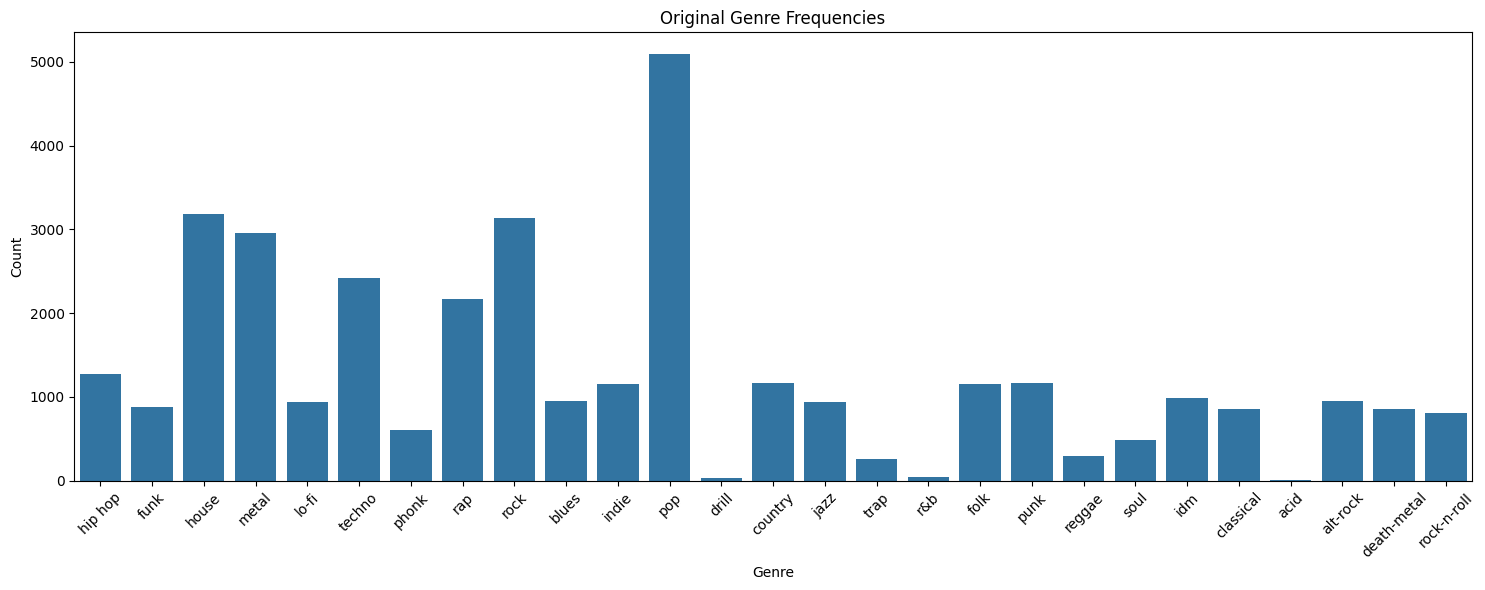

In [19]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


y = y_labels_normalized

freq_original = Counter(y)

orig_genres = list(freq_original.keys())
orig_counts = list(freq_original.values())

fig, axs = plt.subplots(figsize=(15, 6))

sns.barplot(x=orig_genres, y=orig_counts, ax=axs)
axs.set_title("Original Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Remove all songs with genres which do not come up more than n times

Class counts: Counter({'pop': 5097, 'house': 3185, 'rock': 3134, 'metal': 2951, 'techno': 2423, 'rap': 2167, 'hip hop': 1276, 'punk': 1169, 'country': 1167, 'indie': 1152, 'folk': 1151, 'idm': 989, 'alt-rock': 951, 'blues': 948, 'jazz': 944, 'lo-fi': 941, 'funk': 882, 'classical': 851, 'death-metal': 851, 'rock-n-roll': 813, 'phonk': 608, 'soul': 486, 'reggae': 295, 'trap': 259, 'r&b': 40, 'drill': 29, 'acid': 2})


/tmp/ipykernel_1490/1997896913.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(le.classes_)


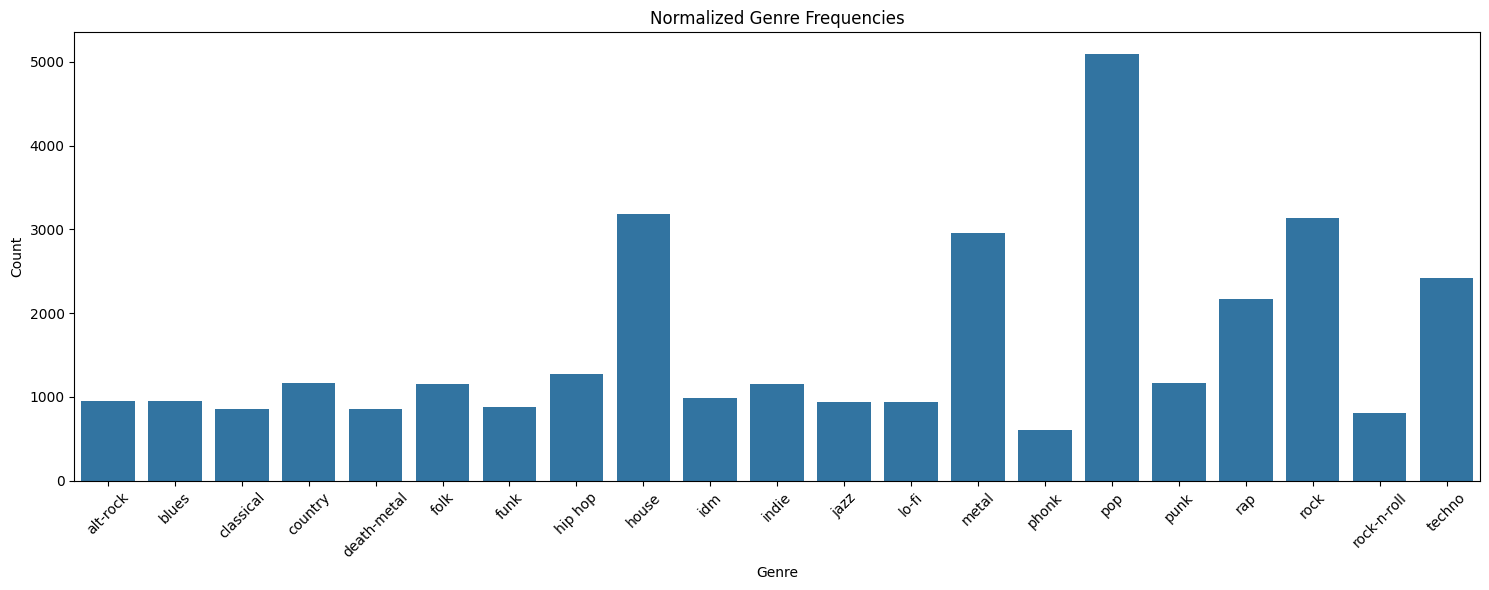

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# --- Encoding/Standardizing X ---
# Remove compex object variables
if np.iscomplexobj(X):
    X = np.abs(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Counting Labels ---
# Check class counts.
counter = Counter(y)
print("Class counts:", counter)

# Keep only classes with at least n samples. At least 2  or any other % 2 == 0 number
#n = 750 # for mapping with regex
#n = 2000 # for idk
n = 500
classes_to_keep = {cls for cls, count in counter.items() if count >= n}
indices_to_keep = [i for i, label in enumerate(y) if label in classes_to_keep]

y = np.array(y)

# Filter the data.
X_filtered = X_scaled[indices_to_keep]
y_filtered = y[indices_to_keep]

# Encode the Genres into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

freq_leftover = Counter(y_encoded)
leftover_genres = list(freq_leftover.keys())
leftover_counts = list(freq_leftover.values())

fig, axs = plt.subplots(figsize=(15, 6))

# Plot normalized label frequencies.
sns.barplot(x=leftover_genres, y=leftover_counts, ax=axs)
axs.set_title("Normalized Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)
axs.set_xticklabels(le.classes_)

plt.tight_layout()
plt.show()


# Remove highly collerating data

Dropping columns: ['feature_5', 'feature_8', 'feature_10', 'feature_14', 'feature_20', 'feature_23', 'feature_29', 'feature_30', 'feature_32', 'feature_34', 'feature_41', 'feature_43', 'feature_44', 'feature_48', 'feature_50', 'feature_53']


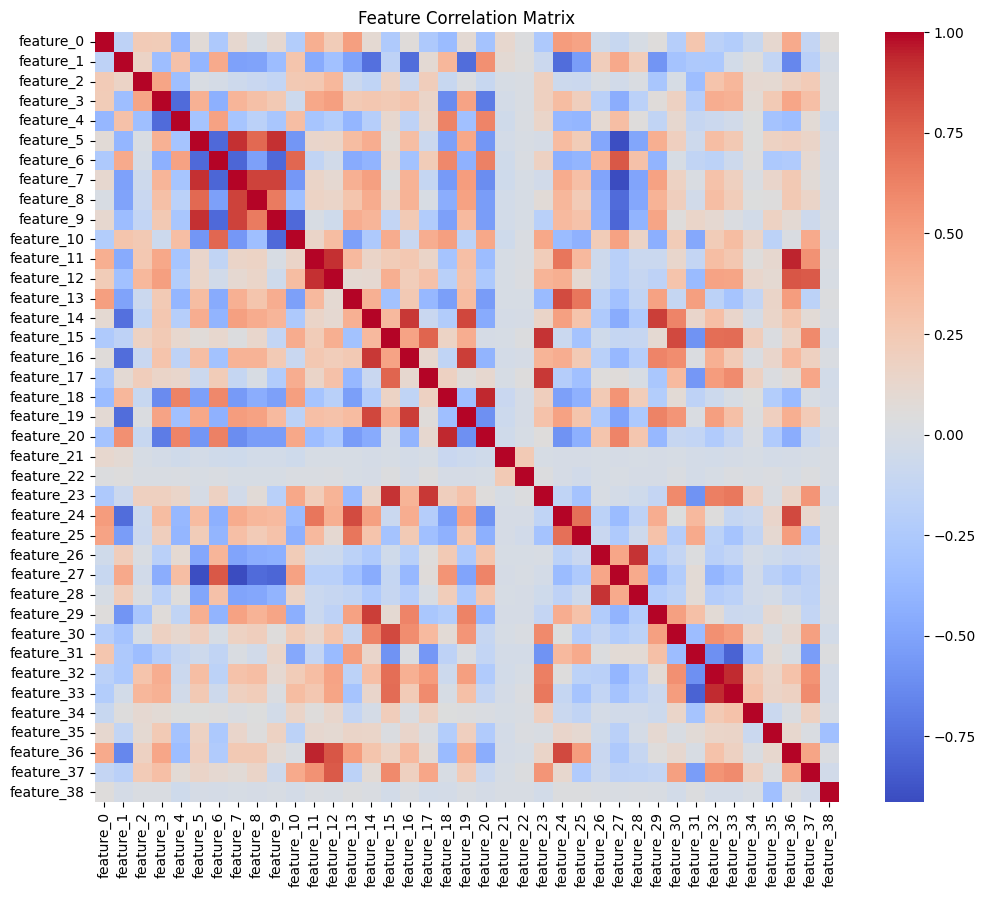

In [21]:
import pandas as pd
import numpy as np

CORRELATING_VALUE = 0.95

X = X_filtered

def remove_highly_correlated_features(X, threshold):
    # If X is a NumPy array, convert it to a DataFrame.
    if isinstance(X, np.ndarray):
        # Create column names if not provided
        X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
    else:
        X_df = X.copy()
    
    # Compute the absolute correlation matrix
    corr_matrix = X_df.corr().abs()
    
    # Create an upper triangle matrix of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify columns to drop: any feature with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("Dropping columns:", to_drop)
    
    # Drop these columns from the dataframe
    X_df_reduced = X_df.drop(columns=to_drop)
    
    # If original X was a NumPy array, return as a NumPy array.
    if isinstance(X, np.ndarray):
        return X_df_reduced.values
    else:
        return X_df_reduced


X_reduced = remove_highly_correlated_features(X, threshold=CORRELATING_VALUE)

# -- Create a feature correlation matrix --
df_features = pd.DataFrame(X_reduced, columns=[f'feature_{i}' for i in range(X_reduced.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

X_filtered = X_reduced


# Create a Test-Train split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (26920, 39) (26920,)
Test set shape: (6730, 39) (6730,)


# Hyperparameter tuning

### Sequential ANN

In [13]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

EPOCHS = 60

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming X_train, X_test, y_train, y_test are already defined
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

def build_model(hp):
    model = models.Sequential()
    
    # First layer: Let tuner choose activation function and number of units.
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])
    units_1 = hp.Int('units_1', min_value=32, max_value=126, step=16)
    #units_1 = hp.Int('units_1', min_value=32, max_value=256, step=32) # Very Big Model
    model.add(layers.Dense(units_1, activation=activation_1, input_shape=(num_features,),
                           kernel_regularizer=regularizers.l2(0.001)))
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    # Optional second layer: conditionally add if chosen by the tuner
    if hp.Boolean("second_layer"):
        activation_2 = hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])
        units_2 = hp.Int('units_2', min_value=16, max_value=126, step=16)
        #units_2 = hp.Int('units_2', min_value=32, max_value=256, step=32) # Very Big
        model.add(layers.Dense(units_2, activation=activation_2,
                               kernel_regularizer=regularizers.l2(0.001)))
        # Optional dropout after second layer
        dropout_rate_2 = hp.Float('dropout_rate_2', 0.0, 0.5, step=0.1)
        model.add(layers.Dropout(dropout_rate_2))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Hyperparameter for learning rate
    lr = hp.Choice('learning_rate', values = [1e-4, 1e-3, 1e-2])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=150,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='activation_tuning'
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Start hyperparameter search
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,  # Increase epochs for a more robust search if time allows
    callbacks=[early_stop]
)

# Retrieve best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
print("Best Hyperparameters:")
print(best_hps.values)

# Train the best model further if needed
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    callbacks=[early_stop],
    #optimzer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")



Trial 3 Complete [00h 00m 49s]
val_accuracy: 0.4161950349807739

Best val_accuracy So Far: 0.4161950349807739
Total elapsed time: 00h 02m 11s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
tanh              |relu              |activation_1
112               |64                |units_1
0.1               |0.3               |dropout_rate
False             |True              |second_layer
0.001             |0.001             |learning_rate
sigmoid           |sigmoid           |activation_2
32                |80                |units_2
0.2               |0.4               |dropout_rate_2

Epoch 1/60
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3075 - loss: 2.3225 - val_accuracy: 0.4040 - val_loss: 1.9053
Epoch 2/60
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3973 - loss: 1.9112 - val_accuracy: 0.4097 - val_loss: 1.8687
Epoch 3/60
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4048 - loss: 1.8740 - val_accuracy: 0.4120 - val_loss:

KeyboardInterrupt: 

### K-Nearest-Neighbour

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Test accuracy:  0.5115401364494121


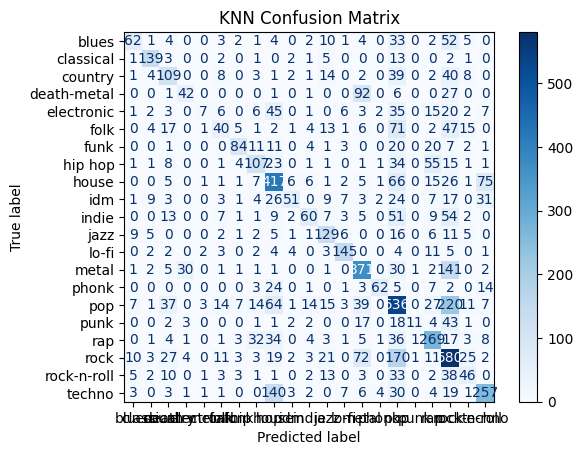

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_neighbors': list(range(1, 41)),         # Try k from 1 to 30
    'weights': ['uniform', 'distance'],        # Weight function
    'metric': ['euclidean', 'manhattan']       # Distance metrics
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Predict using best estimator
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate
print("Test accuracy: ", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()



Todos:

Remove Electronic from Features
Avoid Feature Tuning?
Gridsearch on XGradient Boost


### X-Gradient-Boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

#param_grid = {
#    'n_estimators': [100, 200, 300, 400],
#    'max_depth': [9, 11, 13, 15],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'subsample': [0.6, 0.8, 1.0],
#    'colsample_bytree': [0.6, 0.8, 1.0]
#}

param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(6, 16),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),  # from 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb = XGBClassifier(eval_metric='logloss')
#grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
#grid_search.fit(X_train, y_train)
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=50, cv=5,
    scoring='accuracy', n_jobs=-1, verbose=2, random_state=42
)
random_search.fit(X_train, y_train)


print("Best parameters found: ", random_search.best_params_)

# Predict with the best estimator
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Accuracy
print("Test accuracy: ", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.title("XGBoost Confusion Matrix")
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.20014286128198325, max_depth=13, n_estimators=288, subsample=0.8387400631785948; total time= 2.9min
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.20014286128198325, max_depth=13, n_estimators=288, subsample=0.8387400631785948; total time= 2.9min
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.20014286128198325, max_depth=13, n_estimators=288, subsample=0.8387400631785948; total time= 2.9min
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.20014286128198325, max_depth=13, n_estimators=288, subsample=0.8387400631785948; total time= 2.9min
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.20014286128198325, max_depth=13, n_estimators=288, subsample=0.8387400631785948; total time= 3.0min
[CV] END colsample_bytree=0.7783331011414365, learning_rate=0.02999498316360058, max_depth=13, n_estimators=199, subsample=0.65714672

Accuracy: 0.5873983739837398
Precision: 0.6771452841677659
Recall: 0.5272963803029447
F1 Score: 0.5631642608791545

Classification Report:
               precision    recall  f1-score   support

       blues       0.00      0.00      0.00         0
   classical       0.00      0.00      0.00         0
     country       0.00      0.00      0.00         0
 death-metal       0.00      0.00      0.00         0
  electronic       0.00      0.00      0.00         0
        folk       0.00      0.00      0.00         0
        funk       0.00      0.00      0.00         0
     hip hop       0.00      0.00      0.00         0
       house       0.00      0.00      0.00         0
         idm       0.00      0.00      0.00         0
       indie       0.00      0.00      0.00         0
        jazz       0.00      0.00      0.00         0
       lo-fi       0.00      0.00      0.00         0
       metal       0.00      0.00      0.00         0
       phonk       0.00      0.00      0.00      

/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

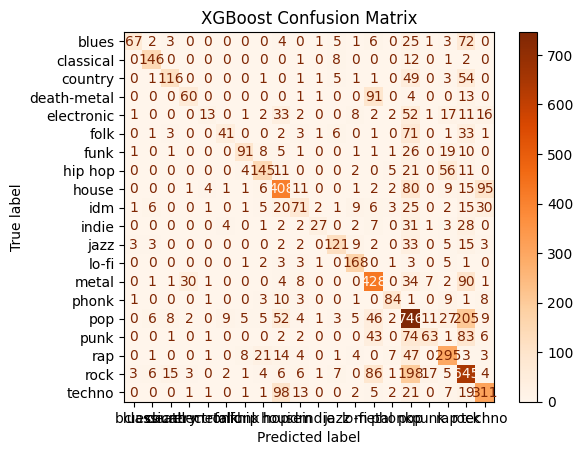

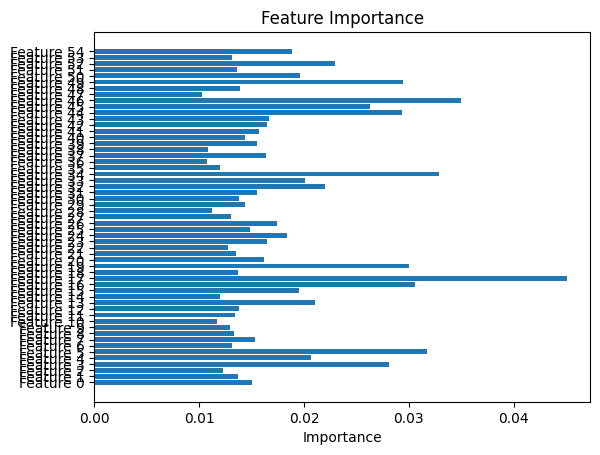

Cross-validated AUC scores: [0.5646888  0.56660617 0.54555354 0.56787659 0.56969147]


KeyboardInterrupt: 

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model_xgb = XGBClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 13,
    subsample = 0.8,
    colsample_bytree = 1.0,
    random_state = 42,
    eval_metric='logloss'
    )
model_xgb.fit(X_train, y_train)


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Predictions
y_pred = model_xgb.predict(X_test)

# Use 'macro', 'micro', or 'weighted' depending on what you want:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=le.classes_))


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, target_names=le.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature Importance
importances = model_xgb.feature_importances_
features = [f"Feature {i}" for i in range(X_train.shape[1])]
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

# Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring=None, n_jobs=-1)
print("Cross-validated AUC scores:", scores)

# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_xgb, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

import matplotlib.pyplot as plt
import numpy as np

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()



### Random Regression Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['log2', 'sqrt']
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R^2 Score: {r2:.2f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title("Random Forest Regression Matrix")
plt.show()


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_trai

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test MSE: 22.89
Test R^2 Score: 0.31


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

### Random Forest Classifier

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  36.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  37.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 1.2min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  35.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  35.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  35.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  35.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 1.2min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 1.2min
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time= 1.3min
[CV] END max_depth=None,

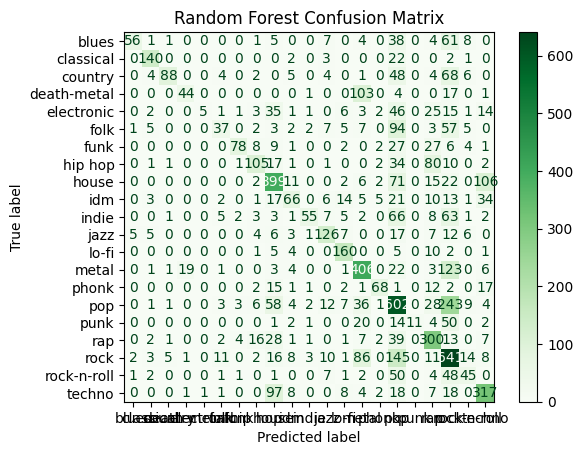

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'n_estimators': [100, 200, 300, 400],             # Number of trees
    'max_depth': [None, 10, 20, 30],             # Max depth of each tree
    'min_samples_split': [2, 5, 10, 20],             # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],               # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']             # Number of features considered for split
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Accuracy and detailed report
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title("Random Forest Confusion Matrix")
plt.show()


# Evaluation Charts

## Confusion Matrix - Shows what was the predicted value compared to the true value when evaluating the Model

The more values in the diagonal line the better

In [ ]:
#BEST_MODEL = best_model # ANN
#BEST_MODEL = best_knn # KNN

#Confusion Matrix
# Get predictions on the test set.
y_pred = np.argmax(best_model.predict(X_test), axis=1)

decoded_y_test = le.inverse_transform(y_test)
decoded_y_pred = le.inverse_transform(y_pred)

# Create confusion matrix.
cm = confusion_matrix(decoded_y_test, decoded_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1

## Loss and Accuracy Plots - Shows how the models loss and accuracy values changed during the training

The closer the lines to each other the better

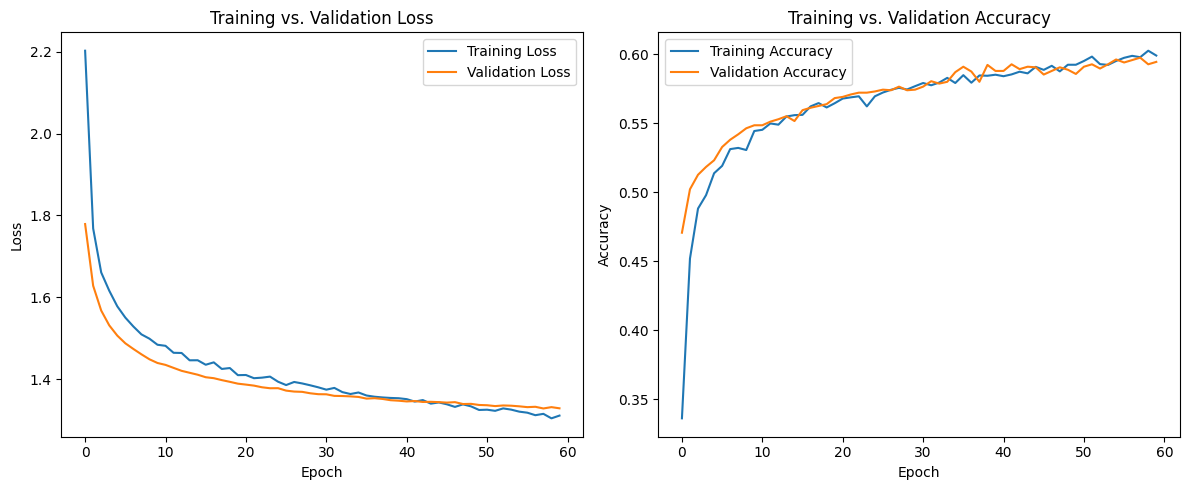

In [26]:
# Plot training vs. validation loss and accuracy.
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Feature Corrleation Matrix - How much the features correlate to each other 

Less correlating features is better

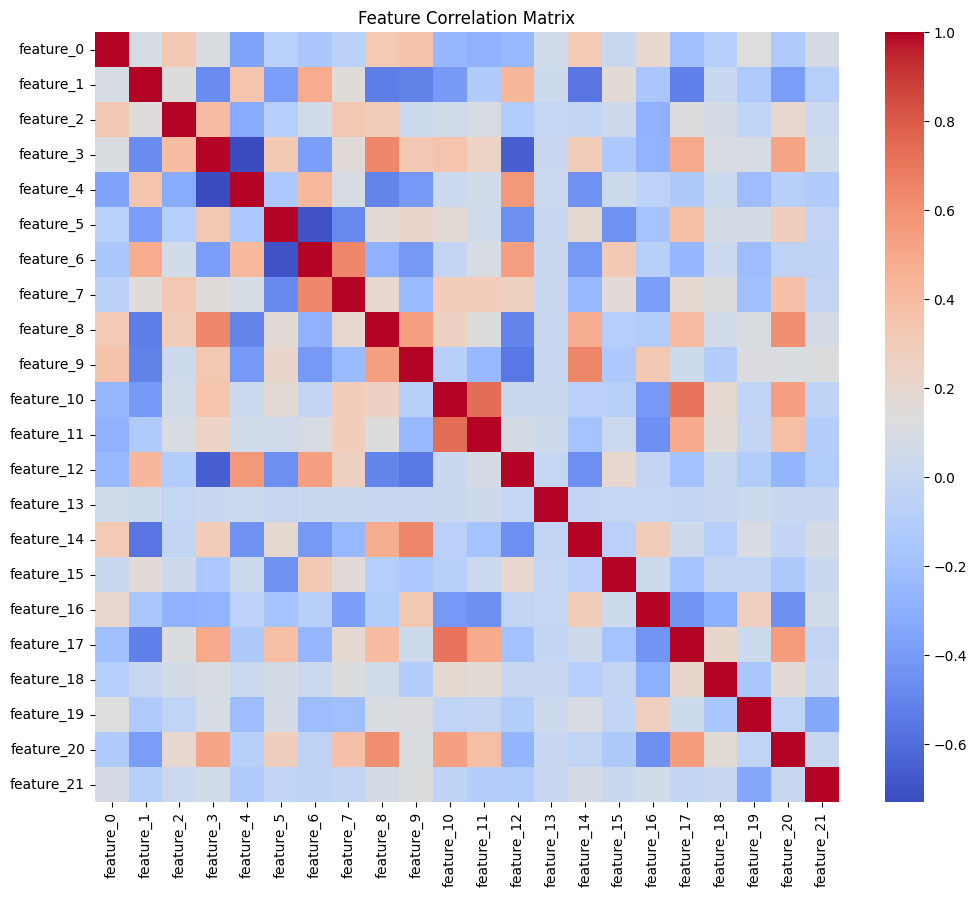

In [27]:
df_features = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

# Feature permutation importance - shows how much each feature was important in making a decision in the model

Potential: remove the non-important features

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
72/72 ━━━━━━━━━━

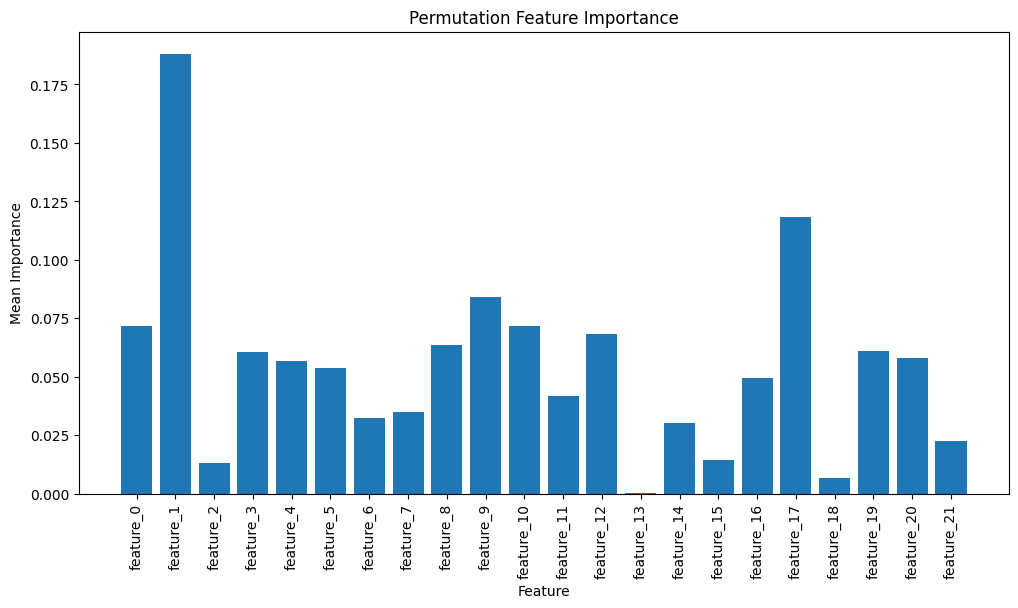

In [28]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Wrapper for the Keras model to work with sklearn's permutation_importance.
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        # Model is already trained.
        return self
    
    def predict(self, X):
        preds = self.model.predict(X)
        return np.argmax(preds, axis=1)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Wrap our trained model.
wrapper = KerasClassifierWrapper(best_model)

# Compute permutation importance on the test set.
result = permutation_importance(wrapper, X_test, y_test, n_repeats=10,
                                random_state=42, scoring='accuracy')
importance_means = result.importances_mean

# Plot the permutation importance.
plt.figure(figsize=(12, 6))
features = [f'feature_{i}' for i in range(X_filtered.shape[1])]
plt.bar(features, importance_means)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean Importance')
plt.title('Permutation Feature Importance')
plt.show()


# Remove unimportant features

In [29]:
import numpy as np
import pandas as pd

# Assume importance_means and importance_threshold are already defined
importance_threshold = 0.01  # adjust this threshold as needed

# Check if X_train is a DataFrame, if not, convert it and assign column names.
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
else:
    X_train_df = X_train.copy()

# Do the same for X_test.
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
else:
    X_test_df = X_test.copy()

# Identify the indices of features with importance greater than or equal to the threshold.
important_feature_indices = np.where(importance_means >= importance_threshold)[0]
print("Important feature indices:", important_feature_indices)

# Retrieve the names of the important features.
important_features = X_train_df.columns[important_feature_indices]
print("Important features:", important_features.tolist())

# Filter the training and test DataFrames to keep only the important features.
X_train_reduced = X_train_df[important_features]
X_test_reduced = X_test_df[important_features]

print("Original training shape:", X_train_df.shape)
print("Reduced training shape:", X_train_reduced.shape)

Important feature indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21]
Important features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_19', 'feature_20', 'feature_21']
Original training shape: (9152, 22)
Reduced training shape: (9152, 20)


# Re-run Hyperparameter search

In [30]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming X_train, X_test, y_train, y_test are already defined
num_features = X_train_reduced.shape[1]
num_classes = len(np.unique(y_train))

def build_model(hp):
    model = models.Sequential()
    
    # First layer: Let tuner choose activation function and number of units.
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])
    units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16)
    model.add(layers.Dense(units_1, activation=activation_1, input_shape=(num_features,),
                           kernel_regularizer=regularizers.l2(0.01)))
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    # Optional second layer: conditionally add if chosen by the tuner
    if hp.Boolean("second_layer"):
        activation_2 = hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])
        units_2 = hp.Int('units_2', min_value=16, max_value=128, step=16)
        model.add(layers.Dense(units_2, activation=activation_2,
                               kernel_regularizer=regularizers.l2(0.01)))
        # Optional dropout after second layer
        dropout_rate_2 = hp.Float('dropout_rate_2', 0.0, 0.5, step=0.1)
        model.add(layers.Dropout(dropout_rate_2))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Hyperparameter for learning rate
    lr = hp.Choice('learning_rate', values = [1e-4, 1e-3, 1e-2])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='activation_tuning'
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Start hyperparameter search
tuner.search(
    X_train_reduced, y_train,
    validation_data=(X_test_reduced, y_test),
    epochs=EPOCHS,  # Increase epochs for a more robust search if time allows
    callbacks=[early_stop]
)

# Retrieve best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
print("Best Hyperparameters:")
print(best_hps.values)

# Train the best model further if needed
history = best_model.fit(
    X_train_reduced, y_train,
    validation_data=(X_test_reduced, y_test),
    epochs=EPOCHS,  # Use best trial's epochs or default
    callbacks=[early_stop],
    #optimzer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test_reduced, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Trial 15 Complete [00h 00m 27s]
val_accuracy: 0.5314685106277466

Best val_accuracy So Far: 0.5375874042510986
Total elapsed time: 00h 05m 30s
Best Hyperparameters:
{'activation_1': 'relu', 'units_1': 32, 'dropout_rate': 0.30000000000000004, 'second_layer': False, 'learning_rate': 0.001}
Epoch 1/60


/home/agres/projects/predictify/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1285 - loss: 3.0461 - val_accuracy: 0.3759 - val_loss: 2.2128
Epoch 2/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3408 - loss: 2.2574 - val_accuracy: 0.4506 - val_loss: 1.9569
Epoch 3/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3925 - loss: 2.0439 - val_accuracy: 0.4729 - val_loss: 1.8457
Epoch 4/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4228 - loss: 1.9363 - val_accuracy: 0.4847 - val_loss: 1.7760
Epoch 5/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4382 - loss: 1.8784 - val_accuracy: 0.4978 - val_loss: 1.7353
Epoch 6/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4466 - loss: 1.8364 - val_accuracy: 0.4991 - val_loss: 1.7031
Epoch 7/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4558 - loss: 1.8005 - val_accuracy: 0.5096 - val_loss: 1.6780
Epoch 8/60
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4622 - loss: 1.7797 - val_accuracy: 0.5118 - val_